In [1]:
import numpy as np
import cv2
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D,BatchNormalization
import numpy as np

from tensorflow.keras.optimizers import Adam
from keras.layers import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

In [2]:
train_dir = 'D:/projects/train'
val_dir = 'D:/projects/test'
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(48,48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(48,48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 7164 images belonging to 7 classes.


In [3]:
emotion_model = Sequential()
emotion_model.add(Conv2D(64, (3, 3), input_shape=(48,48,1)))
emotion_model.add(Activation('relu'))
emotion_model.add(BatchNormalization())
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))

emotion_model.add(Conv2D(128, (3, 3)))
emotion_model.add(Dropout(0.3))
emotion_model.add(Activation('relu'))
emotion_model.add(BatchNormalization())
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))

emotion_model.add(Conv2D(256, (3, 3)))
emotion_model.add(Activation('relu'))
emotion_model.add(BatchNormalization())
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))

emotion_model.add(Conv2D(256, (3, 3)))
emotion_model.add(Activation('relu'))
emotion_model.add(BatchNormalization())
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))

emotion_model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

emotion_model.add(Dense(128))
emotion_model.add(Activation('relu'))
emotion_model.add(BatchNormalization())
emotion_model.add(Dropout(0.25))

emotion_model.add(Dense(64))
emotion_model.add(Activation('relu'))
emotion_model.add(BatchNormalization())

emotion_model.add(Dense(7))
emotion_model.add(Activation('softmax'))

In [4]:
emotion_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 64)        640       
_________________________________________________________________
activation (Activation)      (None, 46, 46, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 46, 46, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 21, 21, 128)       73856     
_________________________________________________________________
dropout (Dropout)            (None, 21, 21, 128)       0         
_________________________________________________________________
activation_1 (Activation)    (None, 21, 21, 128)       0

In [6]:
import datetime
%reload_ext tensorboard
import tensorflow as tf
import keras

emotion_model.compile(loss='categorical_crossentropy',
                      optimizer=Adam(learning_rate=0.001,decay=1e-6),
                      metrics=['accuracy'])

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir,
                                                      histogram_freq=1)

emotion_model_info = emotion_model.fit(
        train_generator,
        steps_per_epoch=28709 // 64,
        epochs=100,
        validation_data=validation_generator,
        validation_steps=7164 // 64,
        callbacks=[tensorboard_callback])

Epoch 1/100
448/448 [==============================] - 282s 626ms/step - loss: 1.5562 - accuracy: 0.4070 - val_loss: 1.9147 - val_accuracy: 0.2024
Epoch 2/100
448/448 [==============================] - 142s 317ms/step - loss: 1.2662 - accuracy: 0.5184 - val_loss: 1.4657 - val_accuracy: 0.4493
Epoch 3/100
448/448 [==============================] - 141s 315ms/step - loss: 1.1367 - accuracy: 0.5683 - val_loss: 1.1936 - val_accuracy: 0.5532
Epoch 4/100
448/448 [==============================] - 141s 315ms/step - loss: 1.0348 - accuracy: 0.6094 - val_loss: 1.1583 - val_accuracy: 0.5632
Epoch 5/100
448/448 [==============================] - 141s 315ms/step - loss: 0.9423 - accuracy: 0.6478 - val_loss: 1.3919 - val_accuracy: 0.4744
Epoch 6/100
448/448 [==============================] - 141s 315ms/step - loss: 0.8405 - accuracy: 0.6912 - val_loss: 1.2068 - val_accuracy: 0.5525
Epoch 7/100
448/448 [==============================] - 143s 319ms/step - loss: 0.7259 - accuracy: 0.7326 - val_loss: 1

In [7]:



emotion_model.save('model_cnn_100_epoch.h5')







In [9]:


from keras.models import load_model
emotion_model = load_model('C:/Users/ayada/model_cnn_100_epoch.h5')




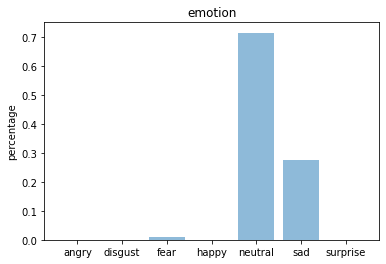

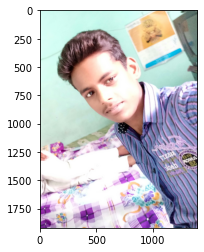

In [10]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt


file = "D:\photos\_20180104_162734.jpg"

true_image = image.load_img(file)
img = image.load_img(file, color_mode="grayscale",
                     target_size=(48, 48))
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255


def emotion_analysis(emotions):
    objects = ('angry', 'disgust', 'fear',
               'happy', 'neutral' , 'sad' ,
               'surprise' )
    y_pos = np.arange(len(objects))
    plt.bar(y_pos, emotions, align='center',
            alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')
    plt.show()
    
custom = emotion_model.predict(x)
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48])


plt.imshow(true_image)
plt.show()